# Introduction

Dans ce TP, vous disposez d’un jeu de données sur la maintenance prédictive. L’idée est de comprendre :

  - Quelles sont les colonnes réellement utiles pour prédire les pannes ?
  - Comment créer de nouvelles caractéristiques (features) qui améliorent la - pertinence de votre futur modèle ?
  - Quelles colonnes risquent de fausser la prédiction (fuites de données, données non pertinentes, identifiants, etc.) ?

À la fin, vous aurez un DataFrame nettoyé et enrichi, prêt à être utilisé pour l’entraînement d’un modèle de Machine Learning (dans un TP ultérieur).

# Importation des librairies et chargement des données

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


url = "https://raw.githubusercontent.com/DlDI/predective-maintenance/refs/heads/main/predictive_maintenance.csv"


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


# À propos du Dataset

Ce dataset est une simulation représentant des cas de maintenance prédictive en industrie. Il contient des données sur des machines et leurs conditions de fonctionnement, permettant d’analyser les causes de panne.

Description des colonnes :

    UID : Identifiant unique (de 1 à 10 000).

    productID : Code produit avec une lettre L, M ou H indiquant la qualité (L = basse, M = moyenne, H = haute).

    air temperature [K] : Température ambiante autour de 300 K, avec de petites variations.

    process temperature [K] : Température du processus, toujours 10 K de plus que la température de l’air.

    rotational speed [rpm] : Vitesse de rotation basée sur une puissance de 2860 W, avec des fluctuations.

    torque [Nm] : Moyenne de 40 Nm, sans valeurs négatives.

    tool wear [min] : Usure de l’outil, variant selon la qualité du produit

    machine failure : Indique si la machine est en panne.

    Target : Indique si la machine est en panne (Oui/Non).
    
    Failure Type : Indique le type de panne.

⚠ Certaines colonnes contiennent des informations sur l’état de la machine et ne doivent pas être utilisées comme entrées dans un modèle prédictif. Les inclure fausserait les résultats en apportant une information que l’on cherche justement à prédire.

In [3]:
df = pd.read_csv(url)

## Exploration des Données

Q1 - Affichez les 9 premières lignes du dataset. Quelle est la taille (nombre de lignes et de colonnes) du dataset ?

Indices : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html#pandas-dataframe-head /
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html#pandas-dataframe-shape



In [13]:
df = pd.read_csv(url)

df.head(9)



,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,No Failure
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,No Failure
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,No Failure
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,No Failure


In [16]:
df.shape


(10000, 10)

Réponse  :

Q2 - Y a-t-il des valeurs manquantes dans les données ? Si oui, dans quelles colonnes et combien ?

indice : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html#pandas-dataframe-isnull / https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html#pandas.DataFrame.sum




In [18]:
df.isnull().sum()

,0
UDI,0
Product ID,0
Type,0
Air temperature [K],0
Process temperature [K],0
Rotational speed [rpm],0
Torque [Nm],0
Tool wear [min],0
Target,0
Failure Type,0


Réponse  :

## Analyse Statistique

Q3 - Quelle est la moyenne, la médiane et l’écart-type des températures (Air et Process) pour chaque type de machine (M, L et H) ?

indice : https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.agg.html#pandas-core-groupby-dataframegroupby-agg

In [26]:
temperature_stats = df.groupby('Type').agg(
    {'Air temperature [K]': ['mean', 'median', 'std'],
     'Process temperature [K]': ['mean', 'median', 'std']}
)
temperature_stats


Air temperature [K]                  Process temperature [K]         \
                    mean median       std                    mean median   
Type                                                                       
H             299.866999  299.8  2.021831              309.925723  309.9   
L             300.015833  300.1  1.987453              310.012300  310.1   
M             300.029263  300.1  2.017358              310.018785  310.0   

                
           std  
Type            
H     1.489362  
L     1.475247  
M     1.498407

Réponse  :

Q4 - Calculer la vitesse moyenne de rotation et le couple moyen par type de machine

indice : https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.mean.html#pandas-core-groupby-dataframegroupby-mean

In [28]:
rpm_torque_stats = df.groupby('Type').agg(
    {'Rotational speed [rpm]': 'mean',
     'Torque [Nm]': 'mean'}
)

rpm_torque_stats


,Rotational speed [rpm],Torque [Nm]
Type,,
H,1538.147557,39.838285
L,1539.469167,39.996600
M,1537.598932,40.017251


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=rpm_torque_stats)

Réponse  :

# Visualisation des Données

[Matplotlib](https://matplotlib.org/stable/) est une bibliothèque de visualisation en Python permettant de créer des graphiques statiques, interactifs et animés. Elle est couramment utilisée pour analyser des données sous forme de courbes, histogrammes ou nuages de points.

[Seaborn](https://seaborn.pydata.org/index.html) est une bibliothèque de visualisation basée sur Matplotlib, conçue pour simplifier la création de graphiques statistiques élégants et informatifs.


Q5 - Tracer un histogramme des températures de l'air et du processus

indice : https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn-histplot

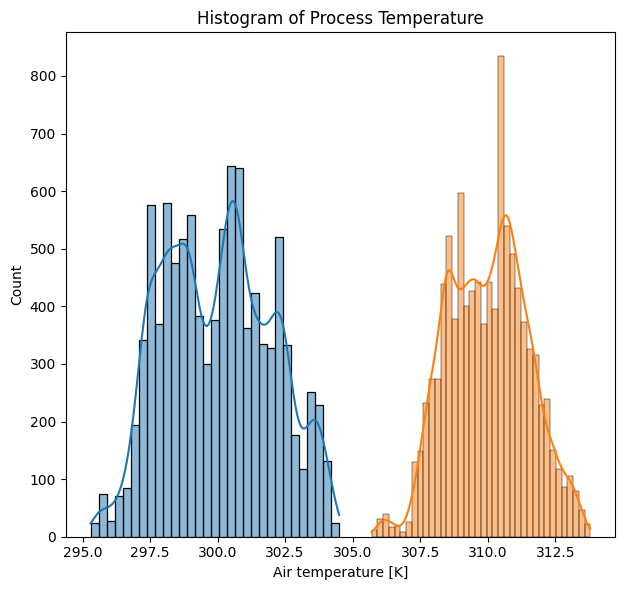

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 2)
sns.histplot(df['Air temperature [K]'], kde=True)
plt.title('Histogram of Air Temperature')

plt.subplot(1, 2, 2)
sns.histplot(df['Process temperature [K]'], kde=True)
plt.title('Histogram of Process Temperature')

plt.tight_layout()
plt.show()


Q6 - Tracer un nuage de points entre la vitesse de rotation et le couple, Interprétez ce graphique.

indice : https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn-scatterplot

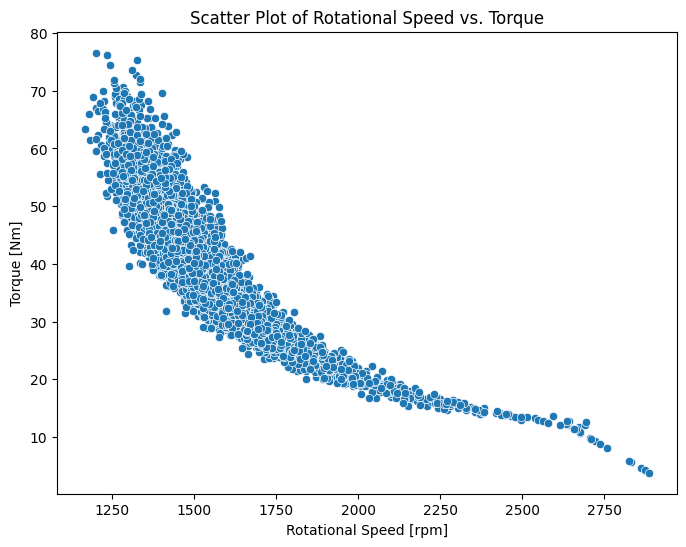

In [38]:


import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Rotational speed [rpm]', y='Torque [Nm]', data=df)
plt.title('Scatter Plot of Rotational Speed vs. Torque')
plt.xlabel('Rotational Speed [rpm]')
plt.ylabel('Torque [Nm]')
plt.show()


### Matrice de Corrélation

En **apprentissage automatique**, la matrice de corrélation permet d’identifier les **redondances entre variables**, optimisant ainsi la sélection des attributs et améliorant la généralisation des modèles. Elle est essentielle pour éviter la colinéarité, qui peut biaiser les modèles de régression linéaire et compromettre leur stabilité.

Elle facilite également **l’ingénierie des features**, en suggérant la fusion ou la transformation de variables corrélées pour en extraire des descripteurs plus pertinents. Enfin, elle est utilisée pour la réduction de dimensionnalité, permettant d’alléger les modèles et d’améliorer leur efficacité computationnelle.

Pour approfondir : https://www.simplilearn.com/tutorials/machine-learning-tutorial/feature-selection-in-machine-learning

Q7 - Créez une matrice de corrélation entre toutes les variables numériques du dataset et affichez-la

Indice : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html#pandas-dataframe-corr / https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn-heatmap

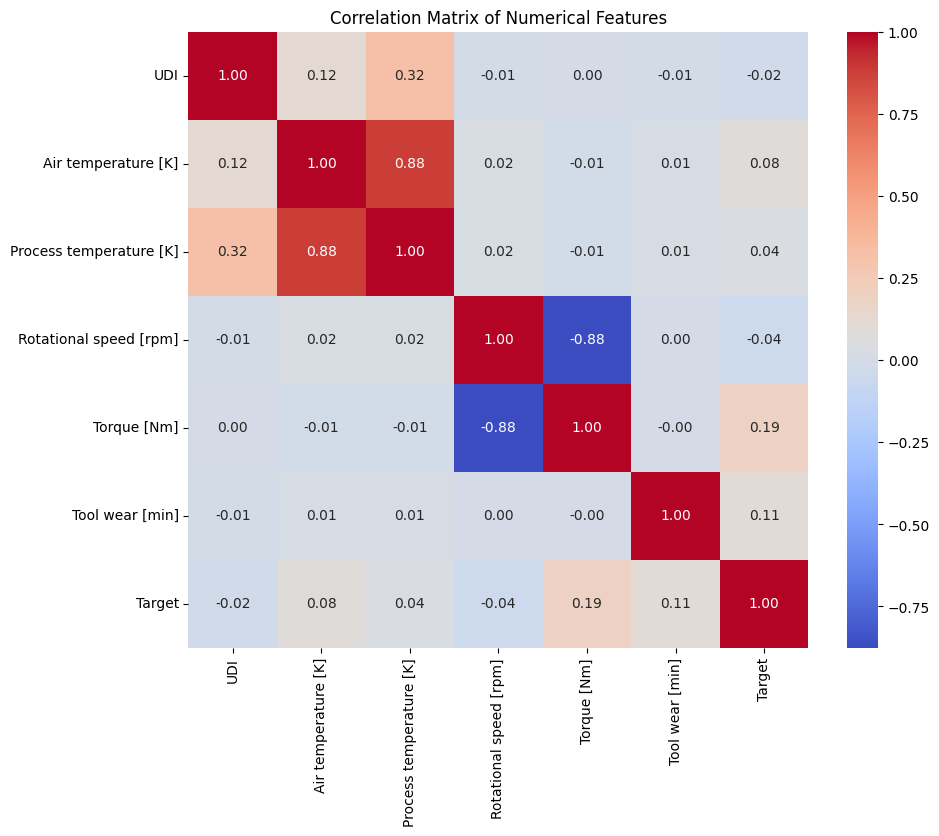

In [40]:
import matplotlib.pyplot as plt


numerical_df = df.select_dtypes(include=np.number)

correlation_matrix = numerical_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


Q8 - Quelle analyse pouvez-vous tirer de la matrice de corrélation ?

- Y a-t-il des variables redondantes qu’il serait utile de supprimer ?
- Peut-on créer de nouvelles features à partir de variables fortement corrélées ?
- Certaines corrélations peuvent-elles influencer la prédiction des défaillances ?

### Réponse  :

## Création de Nouvelles Features

Q9 - Créer une colonne pour l’écart entre température du processus et température ambiante en degrés Celsius. puis créer une colonne pour la puissance mécanique

Indice : Puissance=Couple (Nm)×Vitesse de rotation (rpm)

In [42]:
df['temp_diff'] = df['Process temperature [K]'] - df['Air temperature [K]']
df['power'] = df['Torque [Nm]'] * df['Rotational speed [rpm]']

In [44]:
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,temp_diff,power
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure,10.5,66382.8
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure,10.5,65190.4
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure,10.4,74001.2
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure,10.4,56603.5
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure,10.5,56320.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure,9.6,47318.0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure,9.5,51897.6
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure,9.6,54943.0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure,9.7,68288.0


## Analyse des Défaillances

Q10 - Comparaison des machines en panne et en bon état :  
- Comptez combien de machines sont en panne et combien sont en bon état.
- Calculez la proportion de machines en panne
- Comparez les statistiques des machines en panne vs. en bon état.



In [52]:

failure_counts = df['Failure Type'].value_counts()
print("Machine Failure Counts:\n", failure_counts)


failure_proportion = f"{100 * failure_counts[1] / len(df)}%"
print("\nProportion of machines in bad state:", failure_proportion)

failure_stats = df.groupby('Failure Type').agg({
    'Air temperature [K]': ['mean', 'median', 'std'],
    'Process temperature [K]': ['mean', 'median', 'std'],
    'Rotational speed [rpm]': ['mean', 'median', 'std'],
    'Torque [Nm]': ['mean', 'median', 'std'],
    'Tool wear [min]': ['mean', 'median', 'std']
})
print("\nStatistics Comparison (Good vs. Bad):\n", failure_stats)



Machine Failure Counts:
 Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

Proportion of machines in bad state: 1.12%

Statistics Comparison (Good vs. Bad):
                          Air temperature [K]                    \
                                        mean  median       std   
Failure Type                                                     
Heat Dissipation Failure          302.567857  302.45  0.604371   
No Failure                        299.972855  300.00  1.990937   
Overstrain Failure                299.867949  299.45  1.954050   
Power Failure                     300.075789  300.40  2.147127   
Random Failures                   300.766667  300.75  1.743222   
Tool Wear Failure                 300.288889  300.40  1.967026   

                         Process temperature [K]           

<ipython-input-52-88ed45cdafab>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  failure_proportion = f"{100 * failure_counts[1] / len(df)}%"


Quelles variables semblent influencer les pannes ?



## 2. Séparation des Données

Nous allons **diviser** notre dataset en deux ensembles :
- **Entraînement (train)** : pour apprendre les paramètres du modèle
- **Test** : pour évaluer la capacité de généralisation du modèle

Il est important de **ne pas** mélanger les données d’entraînement et de test afin d’obtenir une évaluation objective des performances.

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# On sépare les features (X) et la target (y)
X = df.drop(['Target', 'UID', 'Product ID', 'Failure Type', 'machine failure'], axis=1, errors='ignore')
y = df['Target']

# Division train/test (80% pour l'entraînement, 30% pour le test, par exemple)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42  # Pour la reproductibilité
)

print("Taille de X_train :", X_train.shape)
print("Taille de X_test  :", X_test.shape)


Taille de X_train : (7000, 9)
Taille de X_test  : (3000, 9)


## 3. Implémentation du Modèle

Nous allons utiliser un **modèle de Régression Logistique**. C’est un algorithme de classification binaire simple et efficace pour prédire la probabilité d’un événement (panne ou non).

# Code a competer
## Probleme 1
Les algorithmes de Machine Learning ne comprennent que les nombres. Si une colonne contient du texte (par exemple “M”, “L”, “H”), il faut la convertir en valeurs numériques. Ainsi, le modèle peut comparer et analyser correctement ces catégories au lieu de traiter des chaînes de caractères.

trouver une solution !

## probleme 2
max iter, trouve le parametre ideale pour notre taille de table

In [63]:
model = LogisticRegression(max_iter=)

### Les algorithmes de Machine Learning ne comprennent que les nombres. Si une colonne contient du texte (par exemple “M”, “L”, “H”), il faut la convertir en valeurs numériques. Ainsi, le modèle peut comparer et analyser correctement ces catégories au lieu de traiter des chaînes de caractères.

model.fit(X_train, y_train)

print("Modèle de régression logistique entraîné avec succès.")

SyntaxError: invalid syntax (<ipython-input-63-8b07134253e8>, line 1)